<a href="https://colab.research.google.com/github/bspychalski/machine-learning-bootacamp/blob/main/supervised/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

Dane

In [4]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data = data)
df_raw


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [5]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [11]:
df.isnull()
df.isnull().sum()
df.isnull().sum().sum()

df.isnull().sum()/len(df)


,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

imputer.statistics_

imputer.transform(df[['weight']])
df[['weight']] = imputer.transform(df[['weight']])

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])


df = df_raw.copy()
df[~pd.notnull(df['weight'])]

df['size'].fillna('L')
df.dropna()

#df[['price']] = imputer.tranform(df[['price']])

#df


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [2]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start = '01-01-2020 09:00', periods=10)

df = pd.DataFrame(data = data, index=date_range)

df

,price
2020-01-01 09:00:00,108.0
2020-01-02 09:00:00,109.0
2020-01-03 09:00:00,110.0
2020-01-04 09:00:00,110.0
2020-01-05 09:00:00,109.0
2020-01-06 09:00:00,NaN
2020-01-07 09:00:00,NaN
2020-01-08 09:00:00,112.0
2020-01-09 09:00:00,111.0
2020-01-10 09:00:00,111.0


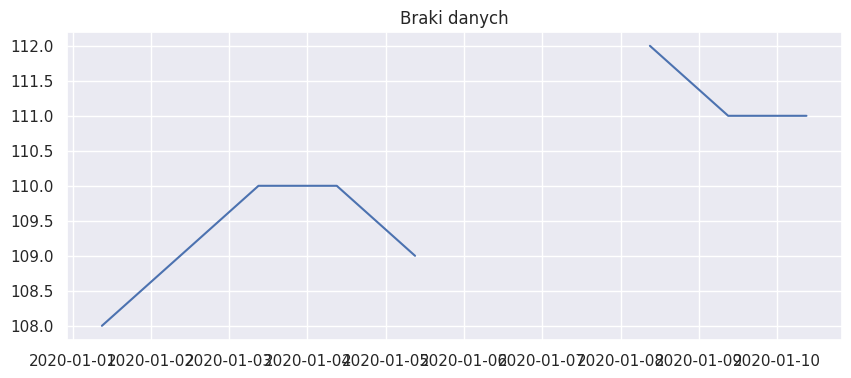

In [3]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [13]:
import plotly.express as px

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method="bfill")
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych')

<ipython-input-13-8c9561f98952>:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

